In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
path="/content/drive/MyDrive/output/PKI_Heart disease.csv"
Heart_df=pd.read_csv(path)
Heart_df.head(5)

,ID,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,1,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,2,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,3,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,4,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,5,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

# New Section

In [ ]:
Heart_df['HeartDisease'].value_counts()

No     274456
Yes     27261
Name: HeartDisease, dtype: int64

In [ ]:
Heart_df.nunique()

ID                  301717
HeartDisease             2
BMI                   3604
Smoking                  2
AlcoholDrinking          2
Stroke                   2
PhysicalHealth          31
MentalHealth            31
DiffWalking              2
Sex                      2
AgeCategory             13
Race                     6
Diabetic                 4
PhysicalActivity         2
GenHealth                5
SleepTime               24
Asthma                   2
KidneyDisease            2
SkinCancer               2
dtype: int64

In [ ]:
Heart_df =  Heart_df[Heart_df.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })
Heart_df['Diabetic'] = Heart_df['Diabetic'].astype(int)

In [ ]:
Heart_df.groupby('HeartDisease').mean()

<ipython-input-9-e990cd28e894>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Heart_df.groupby('HeartDisease').mean()


,ID,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,,,,,,,,,,,,,,,
0,157151.372329,28.345630,0.405996,0.074475,0.027964,3.148366,4.067902,0.125087,0.459083,0.124206,0.776201,7.079550,0.137432,0.030322,0.088626
1,159142.657056,29.411893,0.586075,0.041855,0.160999,7.840321,4.660834,0.367705,0.588680,0.332196,0.637504,7.134991,0.180918,0.126701,0.182238


In [ ]:
Heart_df.head()

,ID,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,1,0,16.60,1,0,0,3,30,0,0,55-59,White,1,1,Very good,5,1,0,1
1,2,0,20.34,0,0,1,0,0,0,0,80 or older,White,0,1,Very good,7,0,0,0
2,3,0,26.58,1,0,0,20,30,0,1,65-69,White,1,1,Fair,8,1,0,0
3,4,0,24.21,0,0,0,0,0,0,0,75-79,White,0,0,Good,6,0,0,1
4,5,0,23.71,0,0,0,28,0,1,0,40-44,White,0,1,Very good,8,0,0,0


In [ ]:
#Write a script to get numeric columns and non-numeric columns 
import numpy as np

def get_dtype_columns(Heart_df, type_):
    if type_ == 'numeric':
        return Heart_df.select_dtypes(include=[np.number]).columns.values
    else:
        return Heart_df.select_dtypes(exclude=[np.number]).columns.values

In [ ]:
#Getting numeric columns
numeric_cols = get_dtype_columns(Heart_df, 'numeric')
numeric_cols

array(['ID', 'HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking',
       'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex',
       'Diabetic', 'PhysicalActivity', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer'], dtype=object)

In [ ]:
#Getting non numeric columns
non_numeric_cols = get_dtype_columns(Heart_df, 'non-numeric')
non_numeric_cols

array(['AgeCategory', 'Race', 'GenHealth'], dtype=object)

In [ ]:
#The unique values for non numeric columns 
for col in non_numeric_cols:
    print('{} -{}'.format(col, Heart_df[col].unique()))

AgeCategory -['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race -['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
GenHealth -['Very good' 'Fair' 'Good' 'Poor' 'Excellent']


In [ ]:
del Heart_df['ID']

In [ ]:
Heart_df =  Heart_df[Heart_df.columns].replace({'55-59':8, '80 or older':13, '65-69':10, '75-79':12, '40-44':5, '70-74':11, '60-64':9, '50-54':7,
 '45-49':6, '18-24':1, '35-39':4, '30-34':3, '25-29':2})
Heart_df['AgeCategory'] = Heart_df['AgeCategory'].astype(int)

In [ ]:
Heart_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,8,White,1,1,Very good,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,13,White,0,1,Very good,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,10,White,1,1,Fair,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,12,White,0,0,Good,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,5,White,0,1,Very good,8,0,0,0


In [ ]:
Heart_df =  Heart_df[Heart_df.columns].replace({'White':1, 'Black':2, 'Asian':3, 'American Indian/Alaskan Native':4, 'Other':6,
 'Hispanic':5})
Heart_df['Race'] = Heart_df['Race'].astype(int)

In [ ]:
Heart_df =  Heart_df[Heart_df.columns].replace({'Very good':2, 'Fair':4, 'Good':3, 'Poor':5, 'Excellent':1})
Heart_df['GenHealth'] = Heart_df['GenHealth'].astype(int)

In [ ]:
#seperating the data and labels
X = Heart_df.drop(columns = "HeartDisease", axis=1)
Y = Heart_df['HeartDisease']

In [ ]:
print (X)

          BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  \
0       16.60        1                0       0               3            30   
1       20.34        0                0       1               0             0   
2       26.58        1                0       0              20            30   
3       24.21        0                0       0               0             0   
4       23.71        0                0       0              28             0   
...       ...      ...              ...     ...             ...           ...   
301712  27.41        1                0       0               7             0   
301713  29.84        1                0       0               0             0   
301714  24.24        0                0       0               0             0   
301715  32.81        0                0       0               0             0   
301716  46.56        0                0       0               0             0   

        DiffWalking  Sex  A

In [ ]:
print (Y)

0         0
1         0
2         0
3         0
4         0
         ..
301712    1
301713    0
301714    0
301715    0
301716    0
Name: HeartDisease, Length: 301717, dtype: int64


In [ ]:
#data standardization
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

[[-1.83082001  1.169689   -0.27755645 ...  2.46456684 -0.20153203
   3.04964275]
 [-1.25259976 -0.8549281  -0.27755645 ... -0.40575081 -0.20153203
  -0.32790726]
 [-0.28786867  1.169689   -0.27755645 ...  2.46456684 -0.20153203
  -0.32790726]
 ...
 [-0.64964283 -0.8549281  -0.27755645 ... -0.40575081 -0.20153203
  -0.32790726]
 [ 0.67531639 -0.8549281  -0.27755645 ... -0.40575081 -0.20153203
  -0.32790726]
 [ 2.8011261  -0.8549281  -0.27755645 ... -0.40575081 -0.20153203
  -0.32790726]]


In [ ]:
X = standardized_data
Y = Heart_df['HeartDisease']

In [ ]:
print(X)
print(Y)

[[-1.83082001  1.169689   -0.27755645 ...  2.46456684 -0.20153203
   3.04964275]
 [-1.25259976 -0.8549281  -0.27755645 ... -0.40575081 -0.20153203
  -0.32790726]
 [-0.28786867  1.169689   -0.27755645 ...  2.46456684 -0.20153203
  -0.32790726]
 ...
 [-0.64964283 -0.8549281  -0.27755645 ... -0.40575081 -0.20153203
  -0.32790726]
 [ 0.67531639 -0.8549281  -0.27755645 ... -0.40575081 -0.20153203
  -0.32790726]
 [ 2.8011261  -0.8549281  -0.27755645 ... -0.40575081 -0.20153203
  -0.32790726]]
0         0
1         0
2         0
3         0
4         0
         ..
301712    1
301713    0
301714    0
301715    0
301716    0
Name: HeartDisease, Length: 301717, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=44)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(301717, 17) (241373, 17) (60344, 17)


In [ ]:
#Training the Model
classifier = svm.SVC(kernel='linear')

In [ ]:
#training the classifier
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
#model evaluation
#accuracy score
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.svm import SVC
%matplotlib inline

#creating different machine learning model
#LogisticRegression
lr_c=LogisticRegression(random_state=0)
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
lr_cm=confusion_matrix(y_test,lr_pred)
lr_ac=accuracy_score(y_test, lr_pred)

#SVM classifier
svc_c=SVC(kernel='linear',random_state=0)
svc_c.fit(X_train,y_train)
svc_pred=svc_c.predict(X_test)
sv_cm=confusion_matrix(y_test,svc_pred)
sv_ac=accuracy_score(y_test, svc_pred)

#Bayes
gaussian=GaussianNB()
gaussian.fit(X_train,y_train)
bayes_pred=gaussian.predict(X_test)
bayes_cm=confusion_matrix(y_test,bayes_pred)
bayes_ac=accuracy_score(bayes_pred,y_test)

#SVM regressor
svc_r=SVC(kernel='rbf')
svc_r.fit(X_train,y_train)
svr_pred=svc_r.predict(X_test)
svr_cm=confusion_matrix(y_test,svr_pred)
svr_ac=accuracy_score(y_test, svr_pred)

#RandomForest
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)

# DecisionTree Classifier
dtree_c=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree_c.fit(X_train,y_train)
dtree_pred=dtree_c.predict(X_test)
dtree_cm=confusion_matrix(y_test,dtree_pred)
dtree_ac=accuracy_score(dtree_pred,y_test)

#KNN
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
knn_cm=confusion_matrix(y_test,knn_pred)
knn_ac=accuracy_score(knn_pred,y_test)

In [ ]:
#accuracy of the models
print('LogisticRegression_accuracy:\t',lr_ac)
print('SVM_regressor_accuracy:\t\t',svr_ac)
print('RandomForest_accuracy:\t\t',rdf_ac)
print('DecisionTree_accuracy:\t\t',dtree_ac)
print('KNN_accuracy:\t\t\t',knn_ac)
print('SVM_classifier_accuracy:\t',sv_ac)
print('Bayes_accuracy:\t\t\t',bayes_ac)

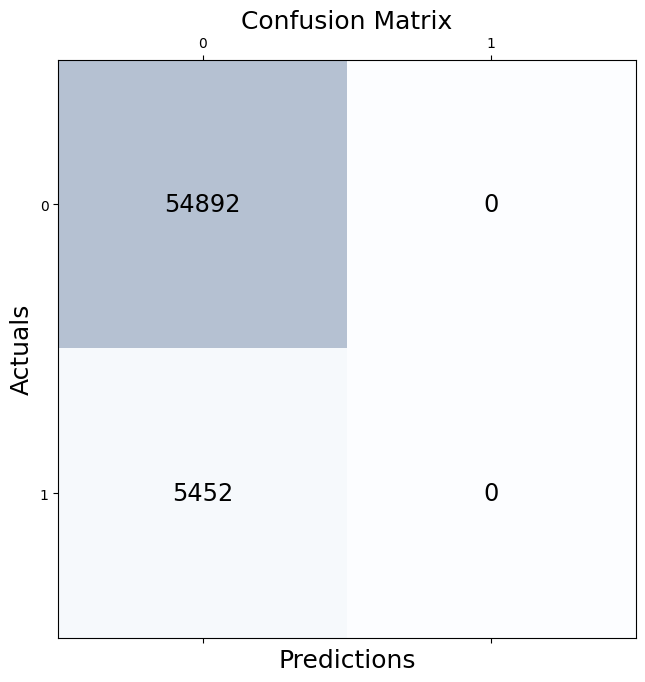

In [ ]:
# Print the confusion matrix using Matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
#
# Get the predictions
#
y_pred = classifier.predict(X_test)
#
# Calculate the confusion matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9096460664614517


In [ ]:
#Make a predictive system

input_data = (32.14,1,0,0,0,0,0,1,12,1,0,1,2,8,1,0,1)

#changing the input_data to numpyarray
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('The patient is not at risk of developing heart disease')
else:
    print('The patient is at risk of having developing disease')

[[ 0.57173148  1.169689   -0.27755645 -0.20408291 -0.43882257 -0.50705407
  -0.4151443   1.06022617  1.25277912 -0.49018432 -0.40848347  0.55629793
  -0.42612515  0.62397141  2.46456684 -0.20153203  3.04964275]]
[0]
The patient is not at risk of developing heart disease


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

In [ ]:
filename = 'HeartDisease_trained_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
#loading the saved model
loaded_model = pickle.load(open('HeartDisease_trained_model.sav', 'rb'))

In [ ]:
#Make a predictive system

input_data = (32.14,1,0,0,0,0,0,1,12,1,0,1,2,8,1,0,1)

#changing the input_data to numpyarray
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = loaded_model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('The patient is not at risk of developing heart disease')
else:
    print('The patient is at risk of having developing disease')

[[ 0.57173148  1.169689   -0.27755645 -0.20408291 -0.43882257 -0.50705407
  -0.4151443   1.06022617  1.25277912 -0.49018432 -0.40848347  0.55629793
  -0.42612515  0.62397141  2.46456684 -0.20153203  3.04964275]]
[0]
The patient is not at risk of developing heart disease


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
